<a href="https://colab.research.google.com/github/aninda1994/Cotton-Diseases/blob/main/Restnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train'
test_path = '/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/val'

In [ ]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs = prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale=1/.255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/.255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data-20200823T045830Z-001/data/val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(training_set, validation_data = test_set, epochs = 20, steps_per_epoch = len(training_set), validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 1604s 26s/step - loss: 14.5802 - accuracy: 0.6279 - val_loss: 6.8992 - val_accuracy: 0.7068
Epoch 2/20
61/61 [==============================] - 40s 662ms/step - loss: 5.0178 - accuracy: 0.7673 - val_loss: 21.7370 - val_accuracy: 0.6204
Epoch 3/20
61/61 [==============================] - 39s 644ms/step - loss: 3.6921 - accuracy: 0.8242 - val_loss: 5.8899 - val_accuracy: 0.7407
Epoch 4/20
61/61 [==============================] - 39s 637ms/step - loss: 2.8209 - accuracy: 0.8447 - val_loss: 6.1657 - val_accuracy: 0.7747
Epoch 5/20
61/61 [==============================] - 39s 634ms/step - loss: 3.0132 - accuracy: 0.8488 - val_loss: 5.6019 - val_accuracy: 0.8086
Epoch 6/20
61/61 [==============================] - 39s 632ms/step - loss: 2.9790 - accuracy: 0.8575 - val_loss: 10.1749 - val_accuracy: 0.7099
Epoch 7/20
61/61 [==============================] - 38s 631ms/s

In [ ]:
import matplotlib.pyplot as plt


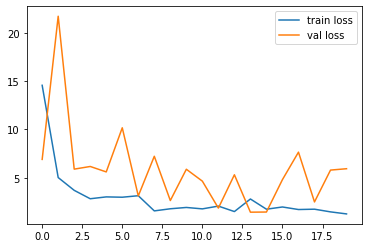

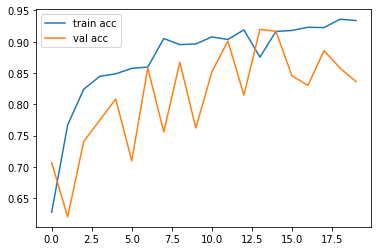

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')